---

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

- Number of Instances: 569
- Number of Attributes: 30 numeric, predictive attributes and the class

**Attribute Information:**
- radius (mean of distances from center to points on the perimeter)
- texture (standard deviation of gray-scale values)
- perimeter
- area
- smoothness (local variation in radius lengths)
- compactness (perimeter^2 / area - 1.0)
- concavity (severity of concave portions of the contour)
- concave points (number of concave portions of the contour)
- symmetry
- fractal dimension ("coastline approximation" - 1)

The mean, standard error, and "worst" or largest (mean of the three worst/largest values) of these features were computed for each image, resulting in 30 features. For instance, field 0 is Mean Radius, field 10 is Radius SE, field 20 is Worst Radius.

- class:
    - WDBC-Malignant
    - WDBC-Benign

**Summary Statistics:**

|                           | Min   | Max    |
|---------------------------|-------|--------|
| radius (mean)             | 6.981 | 28.11  |
| texture (mean)            | 9.71  | 39.28  |
| perimeter (mean)          | 43.79 | 188.5  |
| area (mean)               | 143.5 | 2501.0 |
| smoothness (mean)         | 0.053 | 0.163  |
| compactness (mean)        | 0.019 | 0.345  |
| concavity (mean)          | 0.0   | 0.427  |
| concave points (mean)     | 0.0   | 0.201  |
| symmetry (mean)           | 0.106 | 0.304  |
| fractal dimension (mean)  | 0.05  | 0.097  |
| radius (standard error)   | 0.112 | 2.873  |
| texture (standard error)  | 0.36  | 4.885  |
| perimeter (standard error)| 0.757 | 21.98  |
| area (standard error)     | 6.802 | 542.2  |
| smoothness (standard error) | 0.002 | 0.031 |
| compactness (standard error) | 0.002 | 0.135 |
| concavity (standard error) | 0.0   | 0.396  |
| concave points (standard error) | 0.0 | 0.053 |
| symmetry (standard error) | 0.008 | 0.079  |
| fractal dimension (standard error) | 0.001 | 0.03 |
| radius (worst)            | 7.93  | 36.04  |
| texture (worst)           | 12.02 | 49.54  |
| perimeter (worst)         | 50.41 | 251.2  |
| area (worst)              | 185.2 | 4254.0 |
| smoothness (worst)        | 0.071 | 0.223  |
| compactness (worst)       | 0.027 | 1.058  |
| concavity (worst)         | 0.0   | 1.252  |
| concave points (worst)    | 0.0   | 0.291  |
| symmetry (worst)          | 0.156 | 0.664  |
| fractal dimension (worst) | 0.055 | 0.208  |

**Missing Attribute Values:** None

**Class Distribution:** 212 - Malignant, 357 - Benign

**Creator:** Dr. William H. Wolberg, W. Nick Street, Olvi L. Mangasarian

**Donor:** Nick Street

**Date:** November, 1995

This is a copy of UCI ML Breast Cancer Wisconsin (Diagnostic) datasets.
[Link to dataset](https://goo.gl/U2Uwz2)

Features are computed from a digitized image of a fine needle
aspirate (FNA) of a breast mass. They describe
characteristics of the cell nuclei present in the image.

The separating plane described above was obtained using
Multisurface Method-Tree (MSM-T) [K. P. Bennett, "Decision Tree
Construction Via Linear Programming."

In [1]:
from sklearn.datasets import load_breast_cancer
import pandas as pd

# Load the breast cancer dataset
data = load_breast_cancer()

# Create a pandas DataFrame from the dataset
df = pd.DataFrame(data.data, columns=data.feature_names)

# Add target and class to DataFrame
df['target'] = data.target
df['class'] = data.target_names[data.target]

# separate to malignant and benign for plotting
df_malignant = df[df['target']==0]
df_benign = df[df['target']==1]

# drop target and class for training
df = df.drop(['target', 'class'], axis=1)
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


## Data Exploration

In order to explore the data, I chose to make box plots, Gaussian distribution plots, and a heat map because they provide actionable information regarding preprocessing the data. Box plots provide insights into the central tendency, spread, outliers, and skewness of the data, while Gaussian distribution plots allow for analysis of the shape of the data distribution. Both give insight to the separability of different classes and the selection of good features for the dataset. In addition to box plots and Gaussian distribution plots, I also chose to make a heat map to provide a visual representation of the correlation between each pair of features to help identify potential multicollinearity issues and guide feature selection for the classification model.

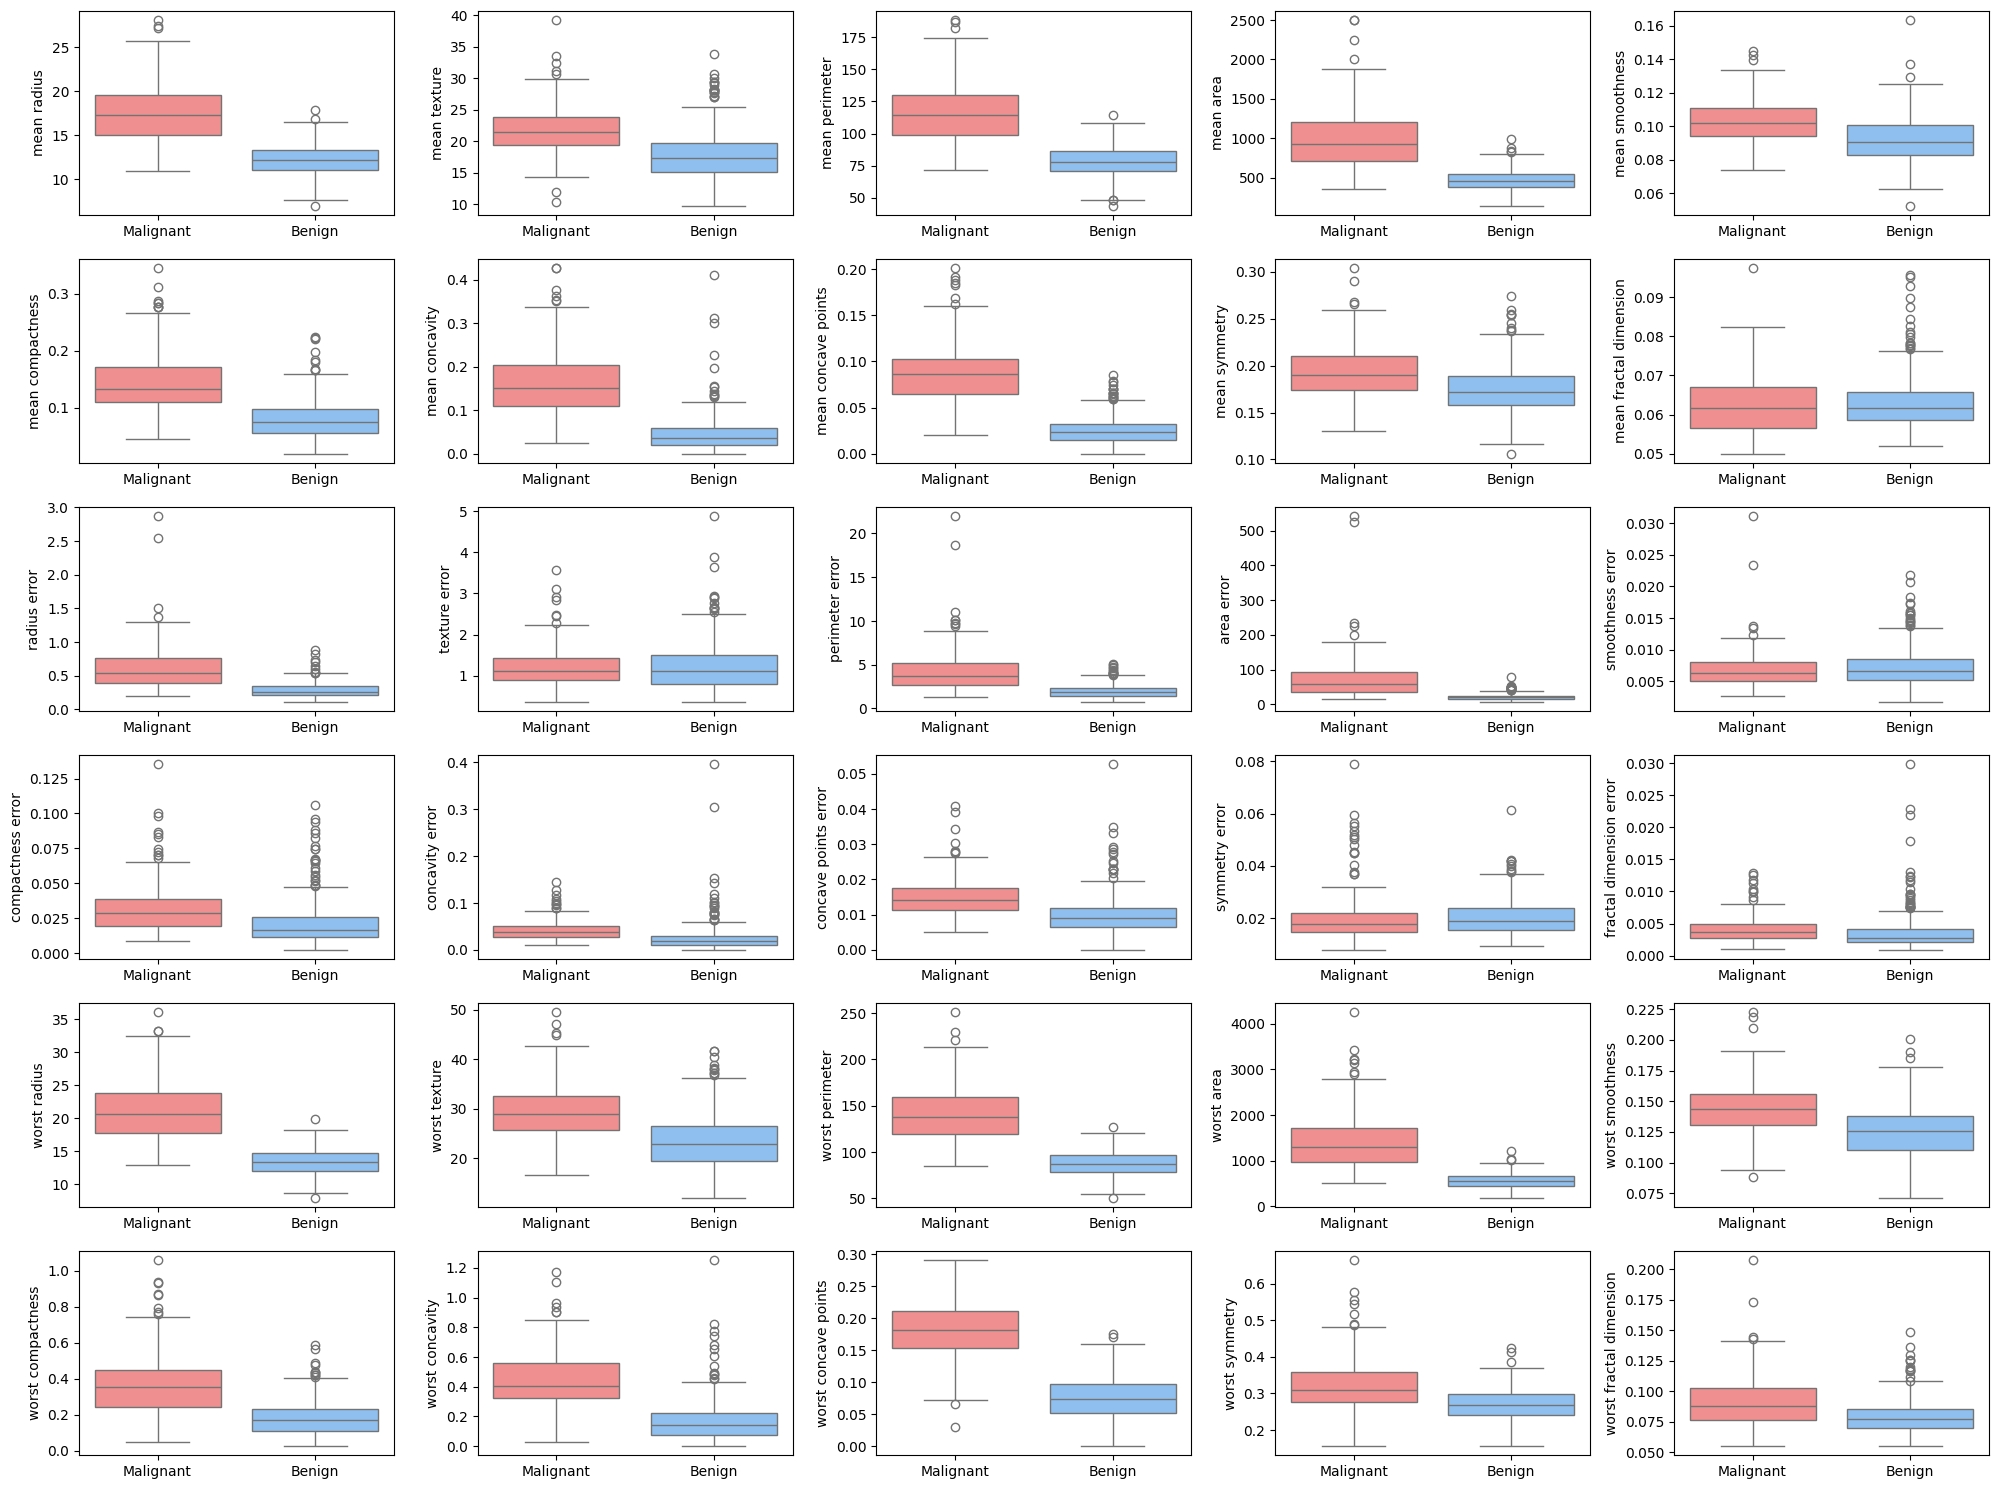

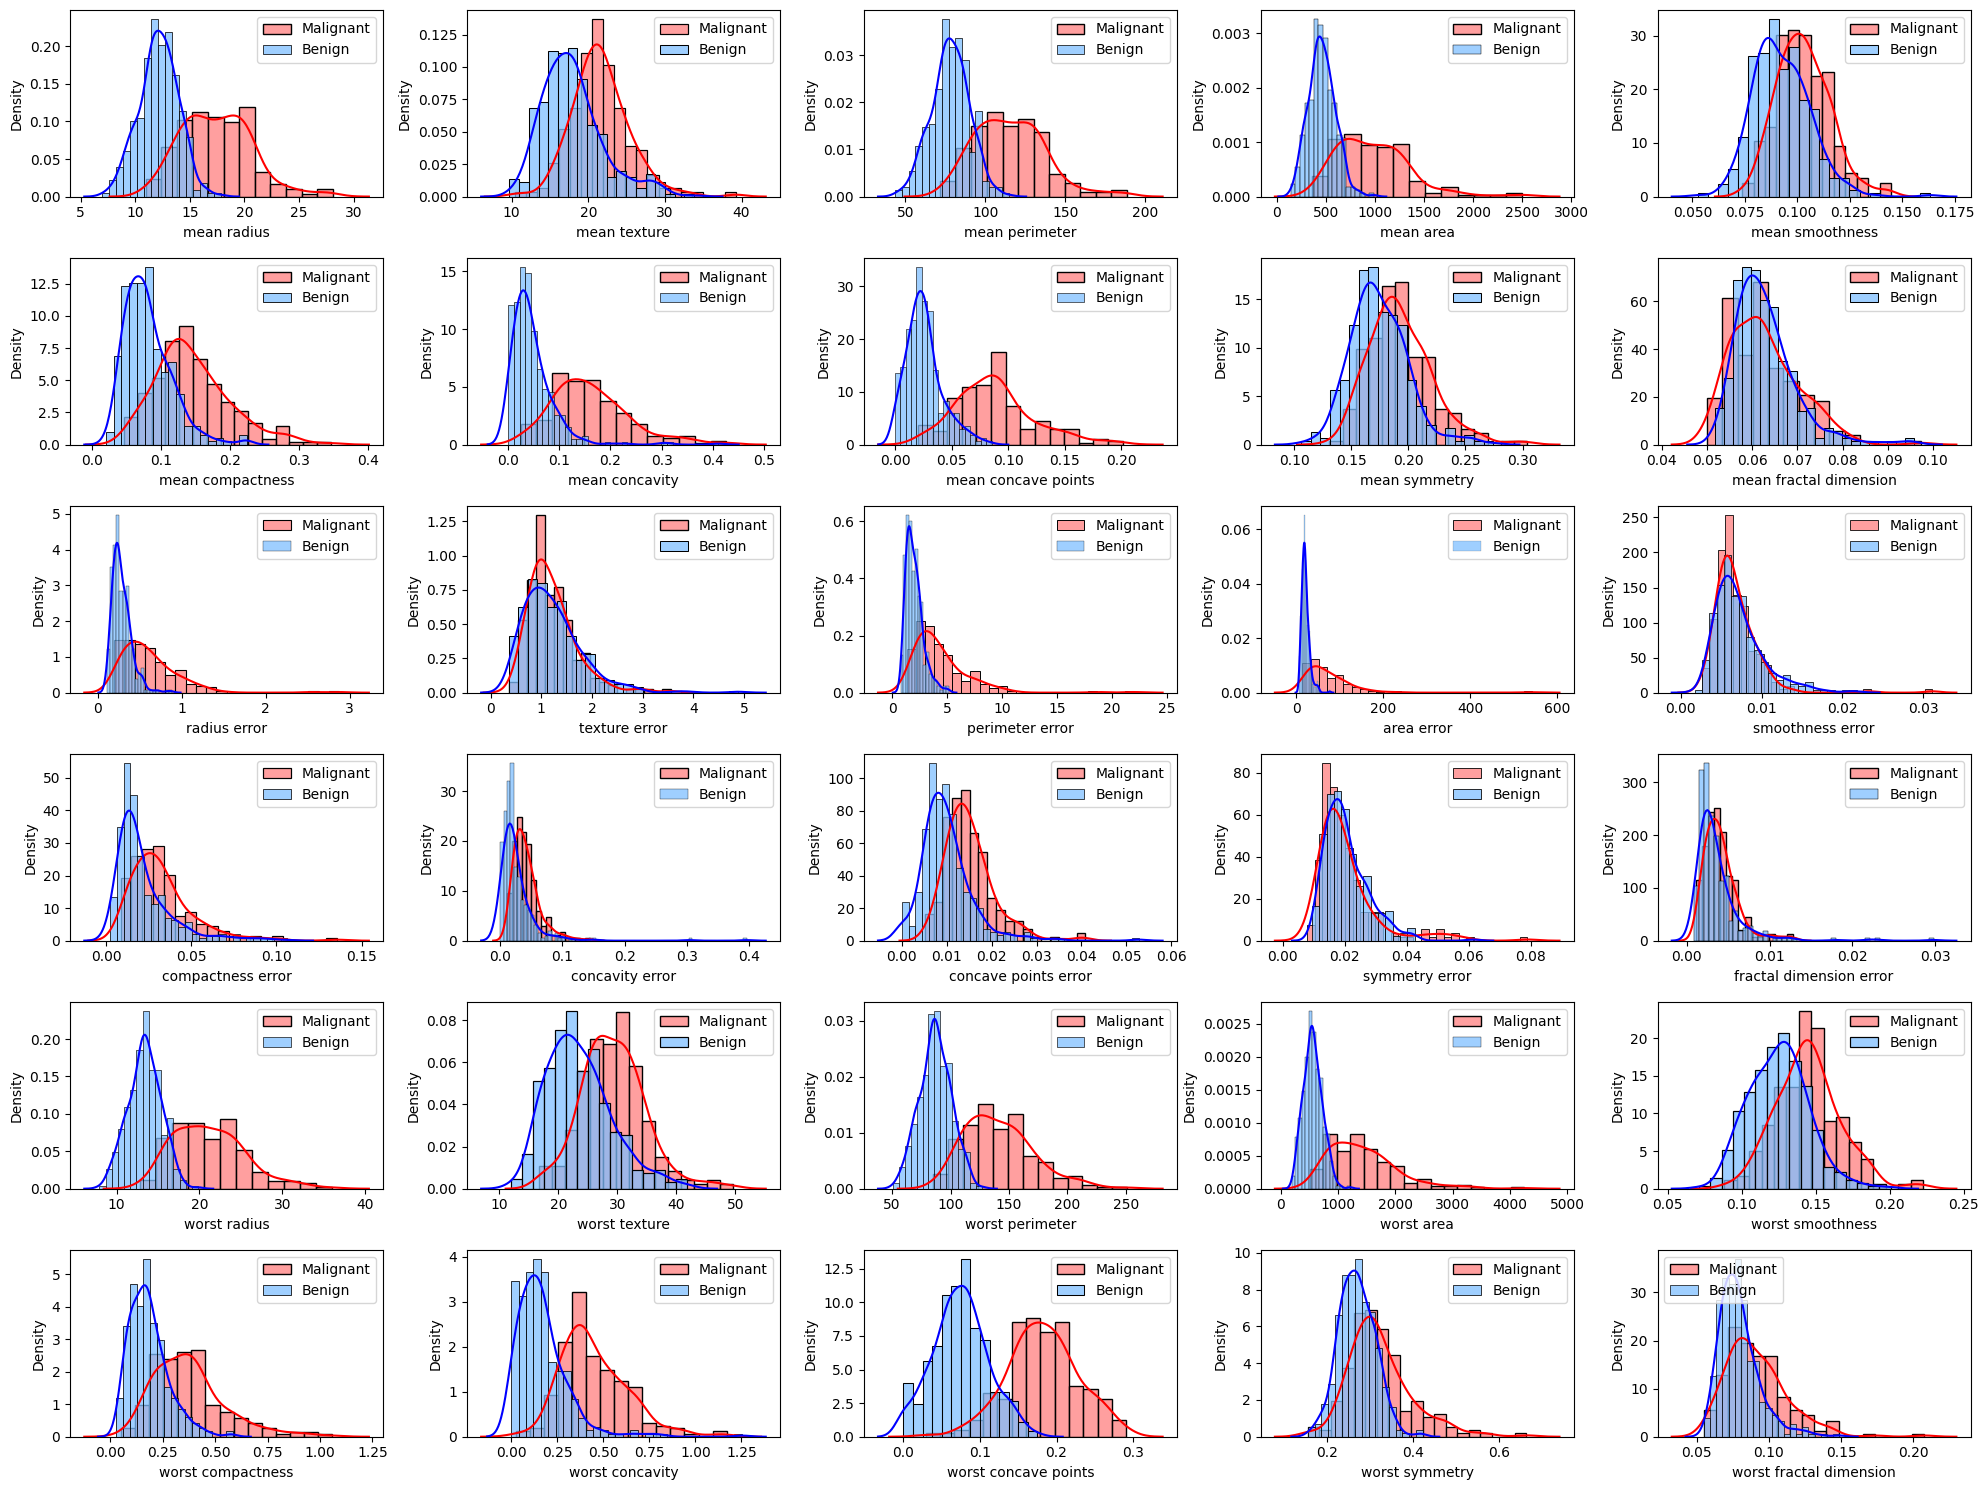

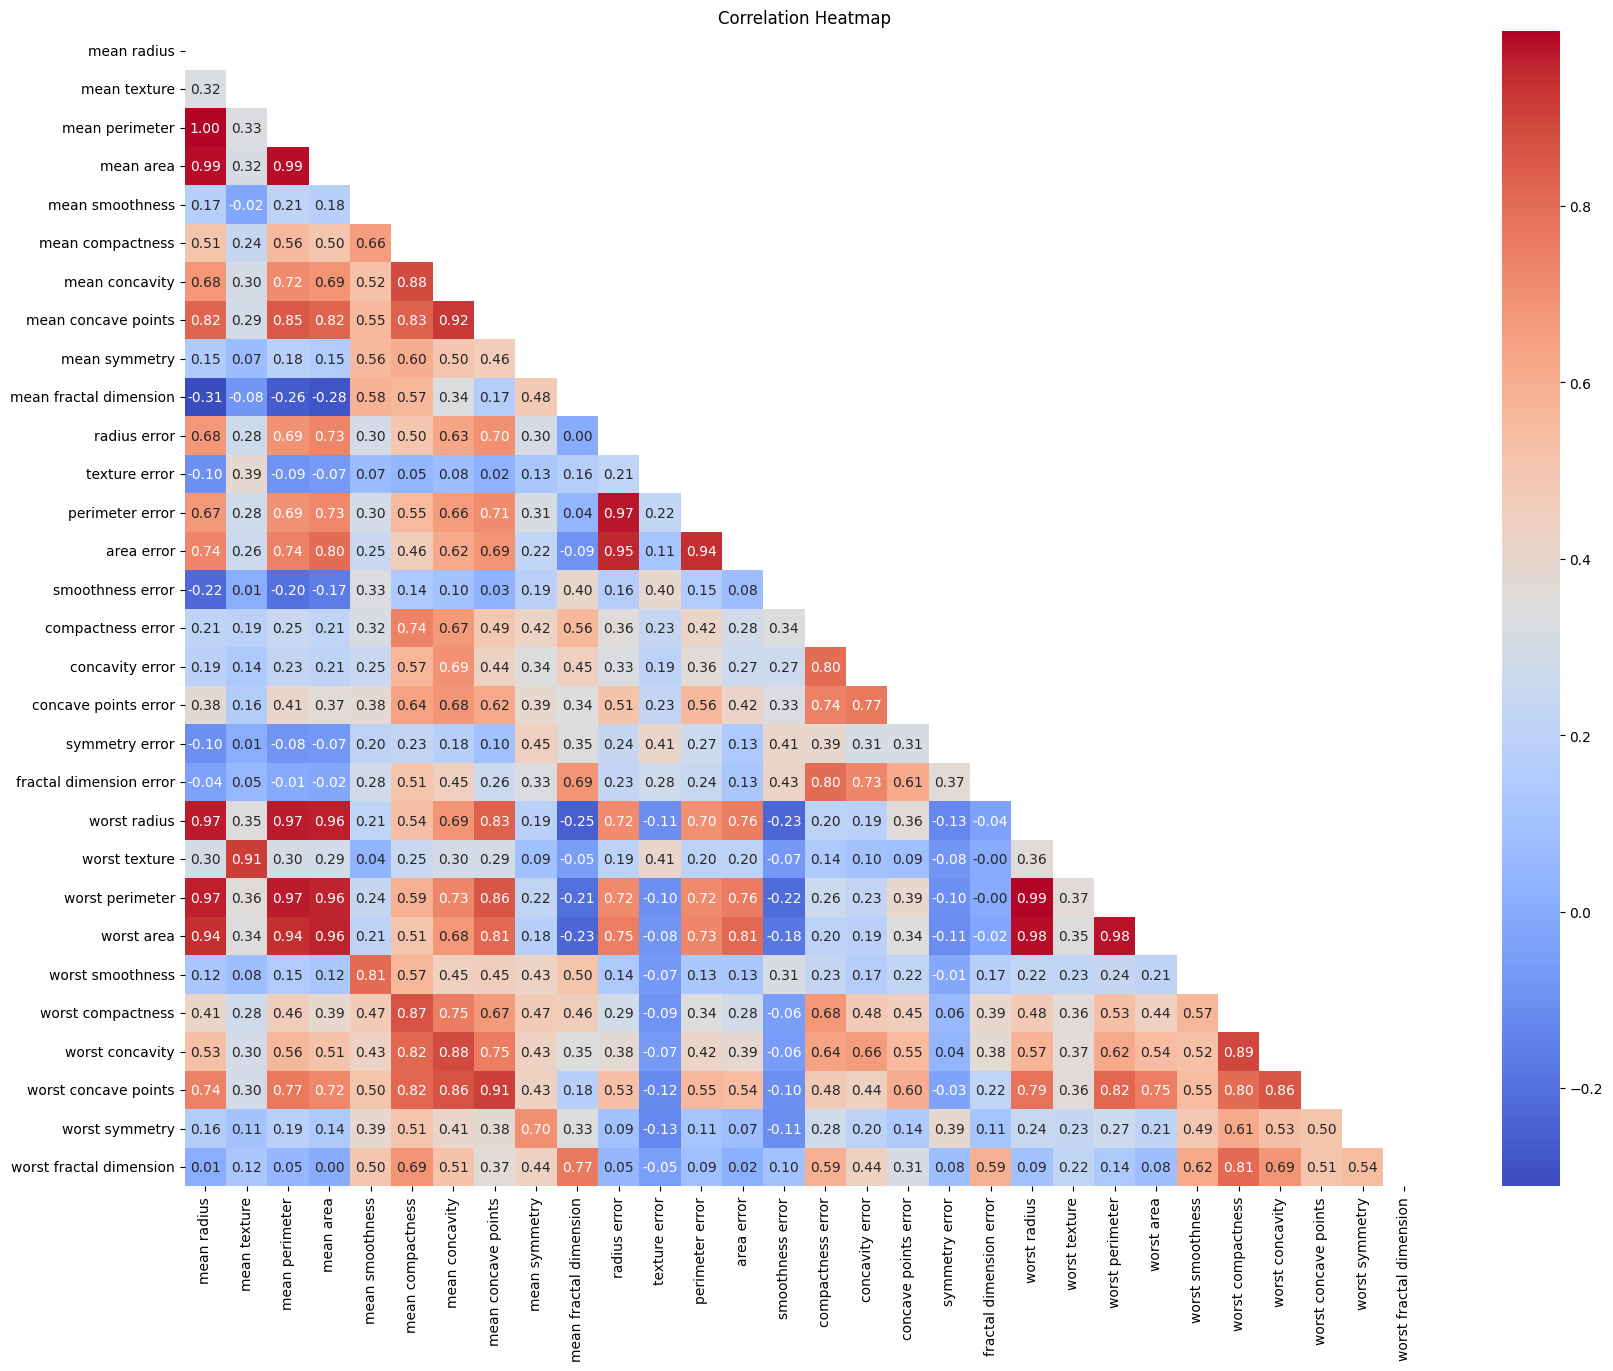

+----+-------------------------+------------+
|    | Feature                 |        VIF |
|----+-------------------------+------------|
|  0 | mean radius             | 63306.2    |
|  1 | mean texture            |   251.047  |
|  2 | mean perimeter          | 58123.6    |
|  3 | mean area               |  1287.26   |
|  4 | mean smoothness         |   393.398  |
|  5 | mean compactness        |   200.98   |
|  6 | mean concavity          |   157.855  |
|  7 | mean concave points     |   154.241  |
|  8 | mean symmetry           |   184.427  |
|  9 | mean fractal dimension  |   629.68   |
| 10 | radius error            |   236.666  |
| 11 | texture error           |    24.6754 |
| 12 | perimeter error         |   211.396  |
| 13 | area error              |    72.4665 |
| 14 | smoothness error        |    26.1702 |
| 15 | compactness error       |    44.9197 |
| 16 | concavity error         |    33.2441 |
| 17 | concave points error    |    53.6987 |
| 18 | symmetry error          |  

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from tabulate import tabulate
from statsmodels.stats.outliers_influence import variance_inflation_factor


# Get the number of features and calculate the number of rows for subplots
num_features = len(data.feature_names)
num_rows = (num_features - 1) // 5 + 1

# Define custom colors for the box plots
colors = ['#FF7F7F', '#7FBFFF']  # Red for malignant, blue for benign

# Box Plots
x_labels = ['Malignant' if i == 0 else 'Benign' for i in data.target]
plt.figure(figsize=(20, 15))
for i, feature in enumerate(data.feature_names):
    plt.subplot(num_rows, 5, i+1)
    sns.boxplot(x=x_labels, y=df[feature], hue=data.target, palette=colors, legend=False)
    plt.ylabel(feature)
plt.tight_layout()
plt.show()

# Gaussian distributions
num_cols = min(num_features, 5)
num_rows = (num_features - 1) // num_cols + 1
plt.figure(figsize=(20, 15)) 
for i, feature in enumerate(df.columns):
    plt.subplot(num_rows, num_cols, i+1)
    sns.histplot(df_malignant[feature], kde=False, stat='density', color=colors[0], label='Malignant')
    sns.histplot(df_benign[feature], kde=False, stat='density', color=colors[1], label='Benign')
    sns.kdeplot(df_malignant[feature], color='red')
    sns.kdeplot(df_benign[feature], color='blue')
    plt.xlabel(feature)
    plt.ylabel('Density')
    plt.legend()
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

# Correlation Heatmap
correlation_matrix = df.corr()
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
plt.figure(figsize=(20, 15))
sns.heatmap(correlation_matrix, mask=mask, cmap='coolwarm', annot=True, fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

# Calculate the VIF values
vif = pd.DataFrame()
vif["Feature"] = df.columns
vif["VIF"] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
print(tabulate(vif, headers='keys', tablefmt='psql'))

## ML and Data Preparation

The data is not ready to be used for machine learning yet. The data needs to be checked for NaN values, outliers, and the features selected during exploration for training need to be normalized.

### Selecting Features

**Measurement Errors:**

Even if measurement errors end up being correlated in this particular dataset, it is unlikely that measurement error in the real world will be a good indicator of malignancy. On this basis, I am choosing to neglect the error features so that the model will not learn to correlate a certain kind of measurement error with malignant tumors. Including these features might also cause issues if there is a change in measurement equipment.

**Addressing Redundancy in the Dataset**

Based on the analysis of the correlation heatmap and VIF values, it is evident that certain features in the dataset exhibit strong correlations with each other. To address the issue of multicollinearity, I have made the following decisions:

- Perimeter and radius are highly correlated with area. Therefore, I have chosen to retain the "area" features and exclude "perimeter" and "radius" features from the analysis.

- "Worst area" is highly correlated with "average area" and does not provide any additional information. Therefore, I have excluded "worst area" from the analysis.

- The features "worst smoothness" and "worst texture" while highly correlated do not show as high correlation with their corresponding mean values as area. This suggests that they might provide additional information beyond their mean values. I have decided to include them in the analysis since this is a small dataset and I do not want to alter the dataset more than is helpful.

By considering both the correlation heatmap and VIF values, these decisions aim to mitigate multicollinearity and ensure that the selected features provide meaningful and independent information for the classification task.

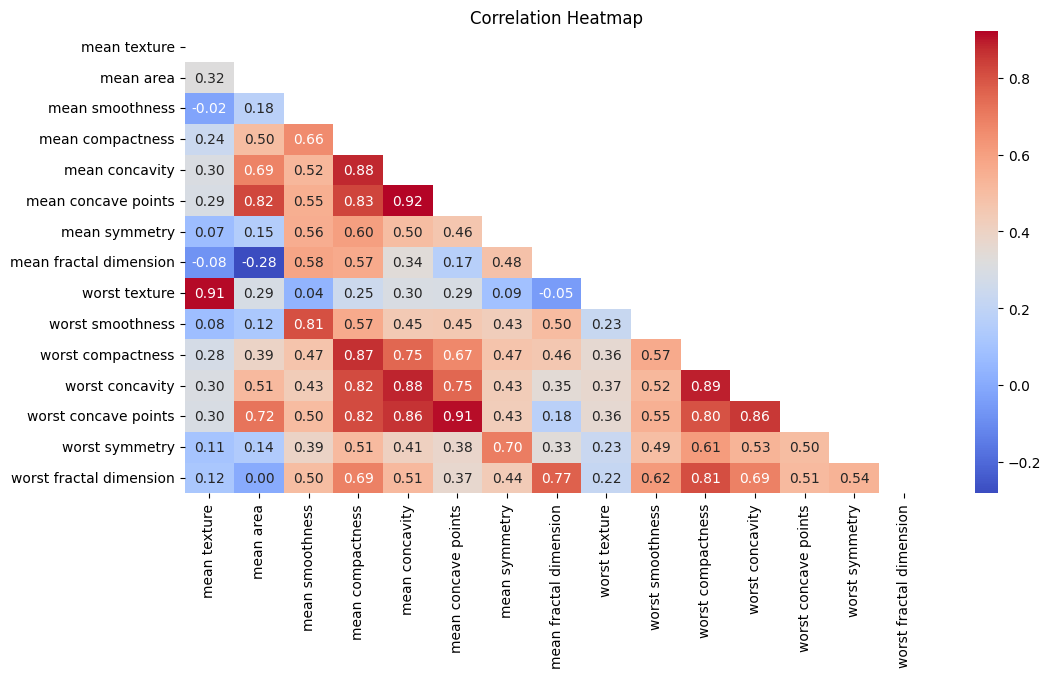

+----+-------------------------+----------+
|    | Feature                 |      VIF |
|----+-------------------------+----------|
|  0 | mean texture            | 166.415  |
|  1 | mean area               |  20.4631 |
|  2 | mean smoothness         | 302.365  |
|  3 | mean compactness        | 103.555  |
|  4 | mean concavity          |  87.0702 |
|  5 | mean concave points     | 106.901  |
|  6 | mean symmetry           | 144.41   |
|  7 | mean fractal dimension  | 414.27   |
|  8 | worst texture           | 159.891  |
|  9 | worst smoothness        | 179.807  |
| 10 | worst compactness       |  79.6199 |
| 11 | worst concavity         |  67.9814 |
| 12 | worst concave points    |  69.9152 |
| 13 | worst symmetry          |  77.7703 |
| 14 | worst fractal dimension | 230.599  |
+----+-------------------------+----------+


In [3]:
# Remove features and show new heatmap and new VIF values

# # Remove NaN values if any
df = df.dropna()

# drop features containing the word "error" (explained above)
df = df.filter(regex='^(?!.*error).*$')
df.drop(['worst radius', 'worst perimeter', 'worst area', 'mean radius', 'mean perimeter'], axis=1, inplace=True)

correlation_matrix = df.corr()

# Replot the correlation heatmap
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
plt.figure(figsize=(12, 6))
sns.heatmap(correlation_matrix, mask=mask, cmap='coolwarm', annot=True, fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

# Calculate the VIF values
vif = pd.DataFrame()
vif["Feature"] = df.columns
vif["VIF"] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
print(tabulate(vif, headers='keys', tablefmt='psql'))


In [4]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from scipy import stats

# Calculate the z-scores for each feature and set a threshold
z_scores = np.abs(stats.zscore(df))
threshold = 3  # keeping 99.7% of the data assuming a normal distribution

# Identify the rows containing outliers (discarding entire row because each row is a single patient. Want to have a general model)
outlier_rows = np.where(np.any(z_scores > threshold, axis=1))
num_dropped_rows = len(outlier_rows[0])
print(f"Number of dropped rows: {num_dropped_rows}")

# Drop the outlier rows from the DataFrame
df = df.drop(outlier_rows[0])
y = data.target
y = np.delete(y, outlier_rows[0])

# Normalize the selected features
scaler = MinMaxScaler()
X = scaler.fit_transform(df)

Number of dropped rows: 49


## Reason for Selecting Model

Since this is a smaller dataset and tumor malignancy appears to be separable based on the features Gaussian distributions, I was originally going to go with the Gaussian Process Classifier from sklearn. However I chose to go with the MLP classifier model instead to give me more flexibility over model architecture in the future if larger training datasets become available where more complex architecture can be implemented instead of the default 100 neurons. Sklearn's MLP classifier also allows for more hyperparameter optimization than the Gaussian Process Classifier. 

+-----------+----------+
| Metric    |    Value |
+===========+==========+
| Accuracy  | 0.976744 |
+-----------+----------+
| Precision | 0.964286 |
+-----------+----------+
| Recall    | 1        |
+-----------+----------+
| F1-score  | 0.981818 |
+-----------+----------+


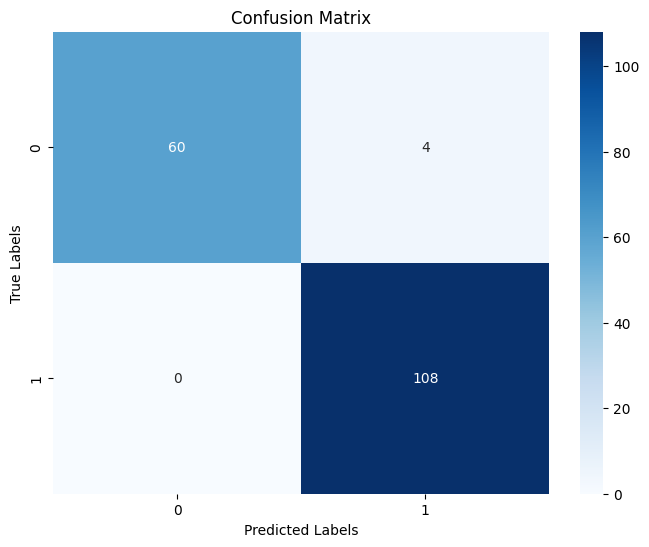

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from tabulate import tabulate

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.33, random_state=12)

# Create an instance of the classifier
classifier = MLPClassifier(
    max_iter=2000, 
    random_state=12,
    hidden_layer_sizes=(100),
    activation='relu',
    solver='adam',
    learning_rate_init=0.001
    )

# Train the model on the training data
classifier.fit(X_train, y_train)

# Test the model on the validation data
classifier_threshold = 0.3 # decreased threshold to 0.3 to increase recall (minimize missing malignant tumors)
y_pred = (classifier.predict_proba(X_val)[:, 1] >= classifier_threshold).astype(int)

# Calculate the evaluation metrics
accuracy = accuracy_score(y_val, y_pred)
precision = precision_score(y_val, y_pred)
recall = recall_score(y_val, y_pred)
f1 = f1_score(y_val, y_pred)
metrics = [
    ["Accuracy", accuracy],
    ["Precision", precision],
    ["Recall", recall],
    ["F1-score", f1]
]

# Print the metrics as a table
print(tabulate(metrics, headers=["Metric", "Value"], tablefmt="grid"))

# Create and plot confusion matrix
cm = confusion_matrix(y_val, y_pred)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

## Hyperparameter Optimization

**Learning Rate**

Learning rate determines the step size at each iteration during the training process. This controls how quickly the model learns from the training data to update its parameters. The optimal learning rate is dependent on the model architecture as well as the dataset. With noisy or volatile data, a slower learning rate will likely help the model perform more reliably and be able to generalize better than a faster learning rate that would more drastically change the model parameters based on noise. The cost of a slower learning rate is more computational resources and if slow enough could prevent the model from being able to effectively predict the nuance and complexity in the data.

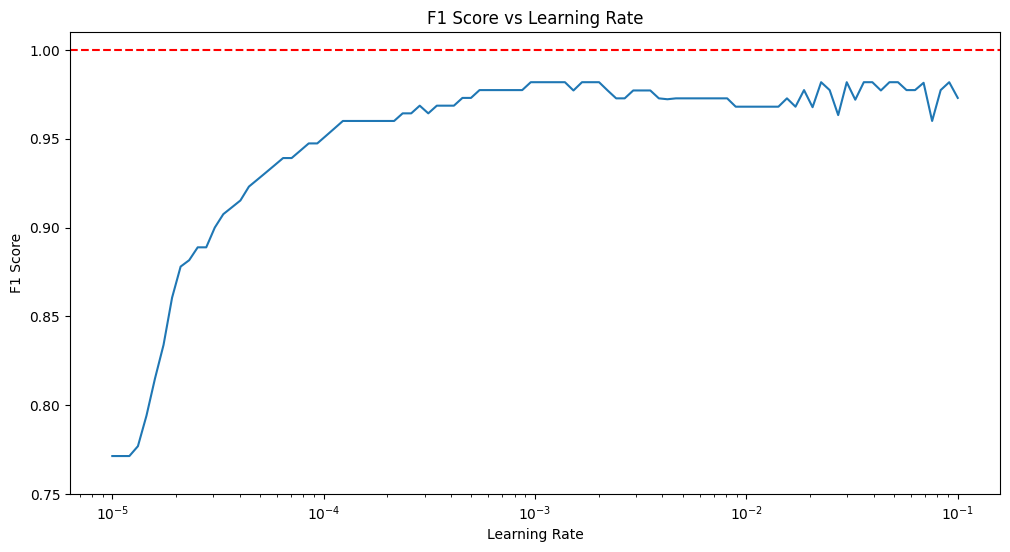

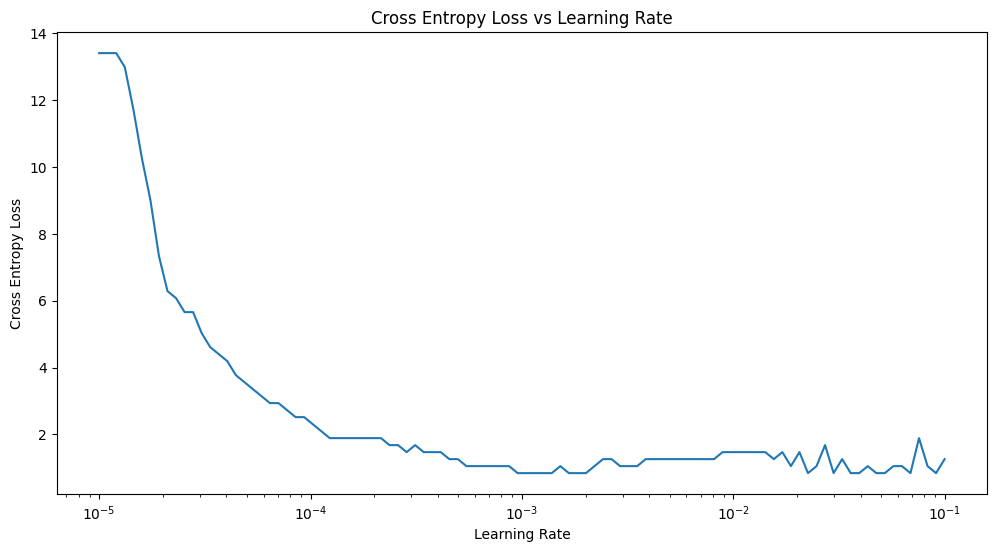

In [6]:
import numpy as np
from sklearn.metrics import f1_score, log_loss

# Define a list of learning rates to try
learning_rates = np.logspace(-5,-1, 100)

# Initialize lists to store learning rates and corresponding F1 scores
learning_rate_values = []
f1_scores = []
loss_scores = []

# Iterate over the learning rates
for learning_rate in learning_rates:
    # Create an instance of the classifier with the current learning rate
    classifier = MLPClassifier(
        max_iter=10000,
        random_state=12,
        hidden_layer_sizes=(100),
        activation='relu',
        solver='adam',
        learning_rate_init=learning_rate,
        learning_rate='constant'
    )

    # Train the model on the training data
    classifier.fit(X_train, y_train)

    # Test the model on the validation data
    y_pred = (classifier.predict_proba(X_val)[:, 1] >= classifier_threshold).astype(int)

    # Calculate the F1 score
    f1 = f1_score(y_val, y_pred)
    loss = log_loss(y_val, y_pred)

    # Append the learning rate and F1 score to the lists
    learning_rate_values.append(learning_rate)
    f1_scores.append(f1)
    loss_scores.append(loss)

# Plot learning rate vs F1 score and cross entropy loss
plt.figure(figsize=(12, 6))
plt.plot(learning_rate_values, f1_scores)
plt.axhline(y=1.00, color='r', linestyle='--')
plt.xscale('log')
plt.xlabel('Learning Rate')
plt.ylabel('F1 Score')
plt.ylim(0.75, 1.01)
plt.title('F1 Score vs Learning Rate')
plt.show()

plt.figure(figsize=(12, 6))
plt.plot(learning_rate_values, loss_scores)
plt.xscale('log')
plt.xlabel('Learning Rate')
plt.ylabel('Cross Entropy Loss')
plt.title('Cross Entropy Loss vs Learning Rate')
plt.show()

## Analysis

  - **How would you explain how well the model is doing to a non-ML specialist?**

  I trained the model on part of the dataset and kept a portion of the data separate so that I could analyze its performance on data it has not seen before to validate the training and increase our confidence in the models performance in production. On the portion of the data that the model had not seen, the model correctly predicted the malignancy of 168/172 tumors, or 97.7%. The 4 misses were benign tumors that the model classified as malignant. The model correctly predicted 100% of malignant tumors as malignant. There are still many avenues for further optimization, but this is an encouraging and exciting result from an initial model.
      

  - **Would you be able to deploy this classifier in real-life?  Would you expect the same accuracy?**

  Assuming this dataset is a representative sample of breast tumors and as long as the model was being used to classify breast tumors based on the same feature set the model was trained on, I am confident in the models performance and ability to correctly classify the malignancy of similar breast cancer tumors. That being said, whether or not this model could be deployed would depend on client specifications and any regulatory requirements if this is to be used as a diagnostic tool or aid in research. 
  
  I presume the model would need to be improved and trained on enough data to give confidence in its performance in such a critical application. I suspect that false positives are less of a concern than false negatives if this is to be a diagnostic tool, which is why I weighted the classification threshold accordingly. I am assuming that a malignant classification would result in further testing to confirm the diagnosis, but a false negative could result in a missed cancer diagnosis. Given more training data and time to optimize model architecture and hyperparameters, I expect a much higher performance in the production model.


  - **How would you monitor the performance of the model to ensure it is as you expect?**
  
  I would monitor the model's performance by the same metrics used during training so that the deployed metrics could be effectively compared to the training and validation metrics during development.


  - **What would you advise the client do to improve the model?  Should he be collecting the data in a different way?  Should he be collecting different data?**

  I would advise the client to look into the different types of breast tumors that may present in clinical practice and determine whether or not there are any types of tumors or cysts that were not included in this dataset and that the model is therefore not trained on. The data the client collected was sufficient for the task at hand, but if there are different types of tumors than the types included in the dataset it is unknown how the model will perform in classifying their malignancy. If there is an imbalance in the known types of benign or malignant tumors, I would suggest collecting more data from the smaller class size to improve the model's classification performance in this binary classification problem. I would not tell the client to exclude any of the features I chose not to train the model on so that as the engineer I could continue to evaluate which data should be included in the model's training. Based on this dataset, I would suggest the client find more "mean" features to collect that were unique and not derived from other features, perhaps a numerical measure of deformation force using some sort of nanoindentation or elastography.




## Instructions

The goal is to do an initial data exploration and training of an initial ML model in a Jupyter notebook.  Any instructions that ask you to explain something should be written in a markdown cell within the notebook.


a. You will be using the breast cancer dataset available form sklearn.  Load the data with the following two commands, then display the data in Jupyter notebook:

from sklearn.datasets import load_breast_cancer
data = load_breast_cancer()


b. Initial exploration of the data
  - What features are there?
  - Make plots of the features and explain what you see.  Why did you choose to make these plots?


c. ML and data preparation
  - Is the data ready to be used for ML?  Explain why or why not.
  - Write any code necessary to prepare the data for ML.


d. Build Initial ML models
  - Write code to split the data into training and validation sets.  Explain why this is necessary.
  - Select one ML classifier to run and explain why you selected it, i.e., at this stage, what do you think are the advantages of this classifier over other classifiers?
  - Write code to train the model and validate its accuracy
  - Select one of the hyper-parameters of the model.  Explain what it does.  Write code to vary the hyper-parameter and report performance.


e. Analysis - Explanation (no code)
  - How would you explain how well the model is doing to a non-ML specialist?
  - Would you be able to deploy this classifier in real-life?  Would you expect the same accuracy?
  - How would you monitor the performance of the model to ensure it is as you expect?
  - What would you advise the client do to improve the model?  Should he be collecting the data in a different way?  Should he be collecting different data?
